In [1]:
import ROOT

Welcome to JupyROOT 6.26/06


# Primeiro Histograma

<h3> 
TH1F <br />
H = histograma <br />
1 = 1 dimensão <br />
F = float  ; I = int
</H3>

In [192]:
hist = ROOT.TH1F('hist','Histograma',100,0,100)
hist.Fill(10)
hist.Fill(90)
hist.GetXaxis().SetTitle("Eixo X") # Eixo X
hist.GetYaxis().SetTitle("Eixo Y") # Eixo Y
c = ROOT.TCanvas("","",800,600)
hist.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


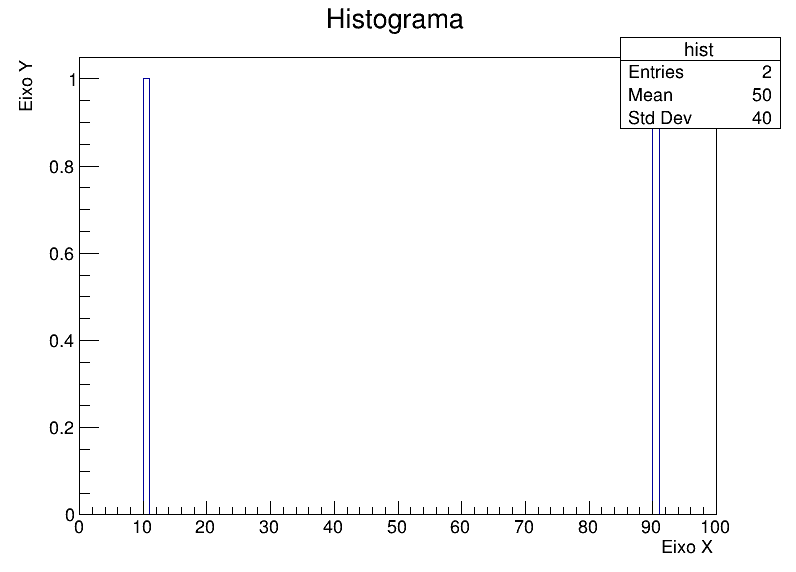

In [193]:
#%jsroot on #Gráfico interativo
c.Draw()


# Primeiro Gráfico

In [4]:
import array
x = array.array("d",[1,2,3,4,5])
y = array.array("d",[1,4,9,16,25])

grafico = ROOT.TGraph(5,x,y)


In [5]:
grafico.SetMarkerStyle(4) # estilo da marca
grafico.SetMarkerSize(1)

In [6]:
c = ROOT.TCanvas()
#grafico.Draw("AL*") # Coloca uma estrela
#grafico.Draw("ACP") # C deixa a curva mais suave
grafico.Draw("ALP") # Padrão

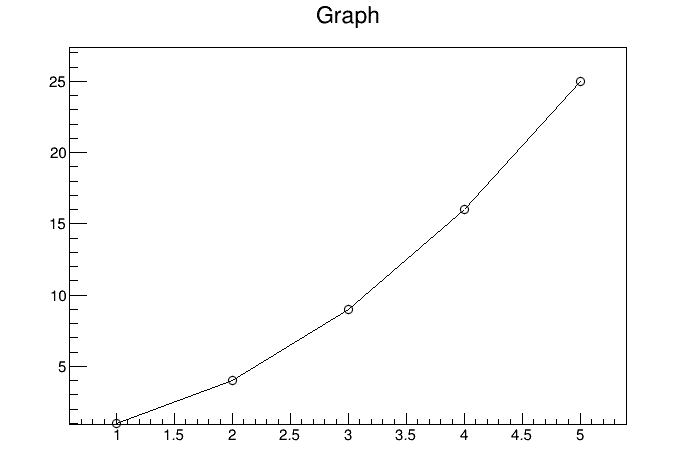

In [7]:
c.Draw()

# Lendo input e criando um histograma

## Lendo Dados

In [ ]:
with open(r'data/data1.txt', 'r') as arq:
    for line in arq:
        valor = float(line)
        hist.Fill(valor)

In [195]:
hist = ROOT.TH1F("hist","histograma",9,1,9)
hist.GetXaxis().SetTitle("Grade")
hist.GetYaxis().SetTitle("Entrada")

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


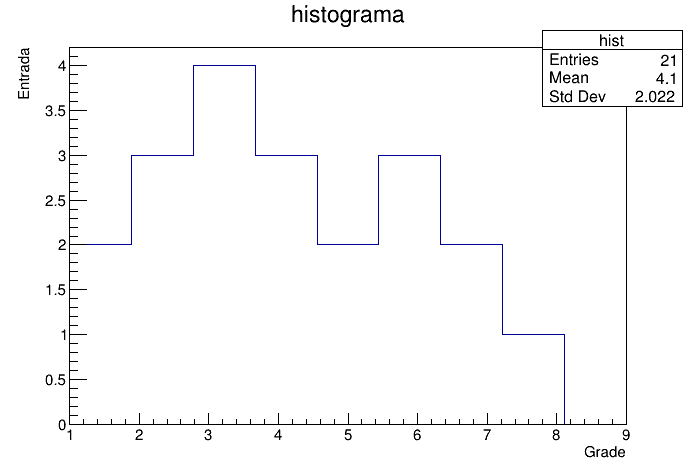

In [197]:
c= ROOT.TCanvas()
hist.Draw()
c.Draw()

# Plot dados em um gráfico

## Lendo os dados

In [57]:
import pandas as pd 

In [198]:
df = pd.read_csv("data/data2.txt",sep=';')
df.head()

,x,y
0,1,1
1,2,4
2,3,100
3,4,16
4,5,25


## colocando no gráfico

In [201]:
import array


x = array.array("d",df.x.array)
y = array.array("d",df.y.array)

grafico = ROOT.TGraph(len(x),x,y)
grafico.SetTitle("Grafico ; Valor x; Valor Y")


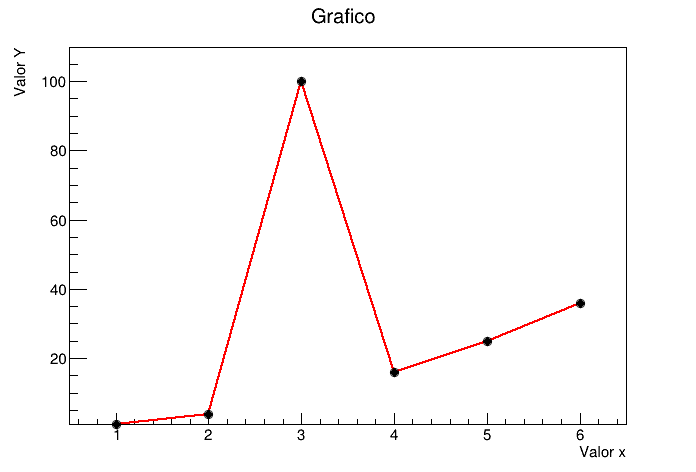

In [202]:
grafico.SetMarkerStyle(20) 
grafico.SetMarkerSize(1)
grafico.SetLineWidth(2)
grafico.SetLineColor(2)
c= ROOT.TCanvas()
grafico.Draw("ALP")
c.Draw()

# Criando números aleatórios

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


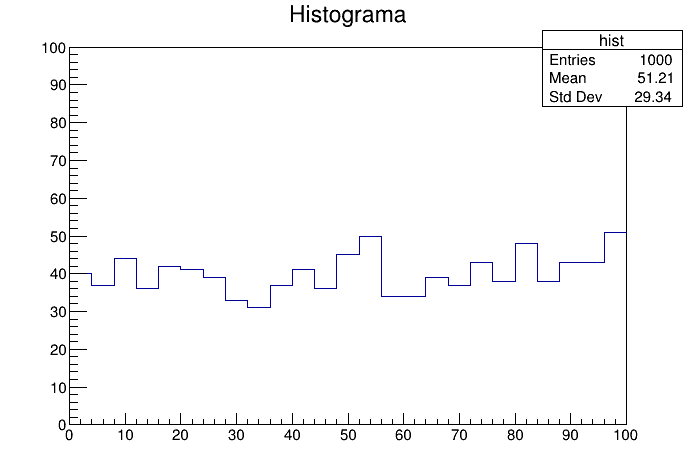

In [138]:
aleatorio = ROOT.TRandom2(1) # se 0 seed "aleatórias"
hist = ROOT.TH1F("hist","Histograma",25,0,100)
c = ROOT.TCanvas()
for i in range(1000):
    r = aleatorio.Rndm()*100 # Rndm uniformemente aleatório entre [0,1]
    hist.Fill(r)

hist.GetYaxis().SetRangeUser(0,100)
hist.Draw()
c.Draw()

# Gerando e ajustando uma distribuição gaussiana

## Criando os numeros aleatorios da guassiana

In [204]:
aleatorio = ROOT.TRandom2(3)
with open(r'data/data3.txt', 'w') as arq:
    for i in range(1000):
        r= aleatorio.Gaus(5,1)#Gauss(Valor médio,Desvio padrão)
        arq.write("%s\n" % r)
    print('OK')    

OK


## Gráfico

In [205]:
hist = ROOT.TH1F("hist","Histograma",100,0,10)
hist.GetXaxis().SetTitle("Distribuicao")
c = ROOT.TCanvas()


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [206]:
with open(r'data/data3.txt', 'r') as arq:
    for line in arq:
        valor = float(line)
        hist.Fill(valor)

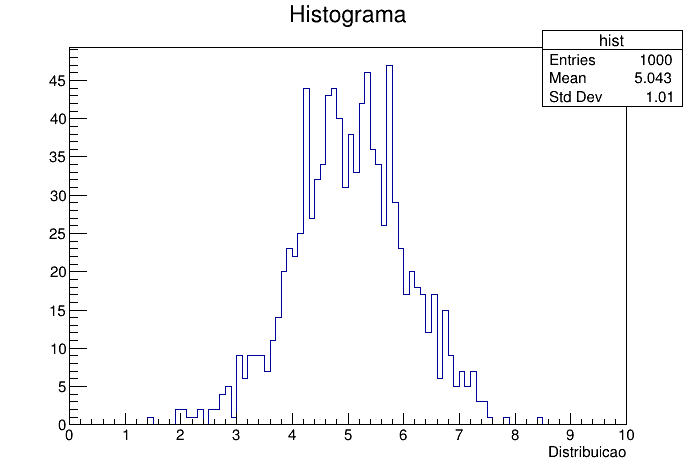

In [208]:
hist.Draw()
c.Draw()

## Ajustando o gráfico

In [209]:
hist.Fit('gaus') 

 FCN=58.2416 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=8.59282e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.89198e+01   1.63924e+00   4.76665e-03  -1.16830e-05
   2  Mean         5.07043e+00   3.25396e-02   1.21431e-04  -9.34939e-04
   3  Sigma        9.70538e-01   2.70371e-02   2.62874e-05   1.72034e-03


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

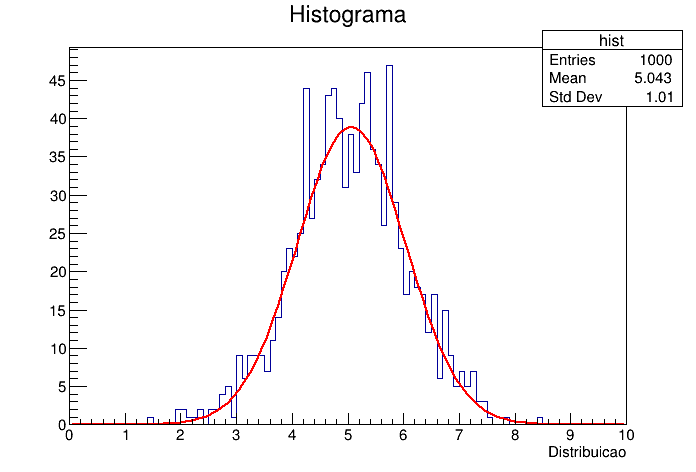

In [210]:
hist.Draw()
c.Draw()

# ajustando funções e parametros